In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from utils.predictiveNet import PredictiveNet
from utils.agent import RandomActionAgent
import itertools
import torch
import random
from utils.env import make_env
from utils.general import saveFig
import matplotlib.pyplot as plt

from analysis.OfflineTrajectoryAnalysis import OfflineTrajectoryAnalysis

from analysis.ExperienceReplayAnalysis import ExperienceReplayAnalysis
from analysis.DiffusionReplayAnalysis import DiffusionReplayAnalysis


In [3]:
savefolder = 'Figures/Replay/'

In [4]:
#Example Net
netname = 'thRNN_5win'
exseed = 102
netfolder = '/maskedk_panel/'
predictiveNet = PredictiveNet.loadNet(netfolder+netname+'-SpeedHD-s'+str(exseed))

Net Loaded from pathname


In [5]:
netname = 'AutoencoderPred_LN'
netfolder = '/Autoencoder_sparse_panel/'
predictiveNet_NS = PredictiveNet.loadNet(netfolder+netname+'-Onehot-s'+str(exseed))

Net Loaded from pathname


In [6]:
env = predictiveNet.EnvLibrary[0]
agentname = 'RandomActionAgent'
action_probability = np.array([0.15,0.15,0.6,0.1,0,0,0])
agent = RandomActionAgent(env.action_space,action_probability)
_, _, decoder = predictiveNet.calculateSpatialRepresentation(env,agent,
                                             trainDecoder=True, trainHDDecoder = True)

/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:340: RuntimeWarning: invalid value encountered in divide
  fxfr = fx / fr
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:351: RuntimeWarning: invalid value encountered in divide
  SI = SI / fr[:, 0, 0]


Training Decoder on cuda...
loss: 5.804770 [    0\ 5000]
loss: 0.623502 [  500\ 5000]
loss: 0.405663 [ 1000\ 5000]
loss: 0.309263 [ 1500\ 5000]
loss: 0.248411 [ 2000\ 5000]
loss: 0.205292 [ 2500\ 5000]
loss: 0.180527 [ 3000\ 5000]
loss: 0.154025 [ 3500\ 5000]
loss: 0.135922 [ 4000\ 5000]
loss: 0.120506 [ 4500\ 5000]
loss: 0.108323 [ 4999\ 5000]
Training Complete. Back to the cpu
Training Decoder on cuda...
loss: 1.393833 [    0\ 5000]
loss: 0.015897 [  500\ 5000]
loss: 0.007186 [ 1000\ 5000]
loss: 0.004646 [ 1500\ 5000]
loss: 0.003355 [ 2000\ 5000]
loss: 0.002567 [ 2500\ 5000]
loss: 0.002016 [ 3000\ 5000]
loss: 0.001591 [ 3500\ 5000]
loss: 0.001264 [ 4000\ 5000]
loss: 0.000998 [ 4500\ 5000]
loss: 0.000809 [ 4999\ 5000]
Training Complete. Back to the cpu


In [7]:
basenoise = 0.03
plusnoise= 0.2
numtrials = 30
OTA = OfflineTrajectoryAnalysis(predictiveNet, noisemag = 0, noisestd=plusnoise,
                               withIsomap=False, decoder=decoder, calculateViewSimilarity=True,
                               compareWake=True)
DRA = DiffusionReplayAnalysis(predictiveNet, decoder = OTA.decoder,
                            compareWake=True, actionAgent=None,
                              noisestd = plusnoise, num_trials = numtrials)

Running SLEEP
Running WAKE


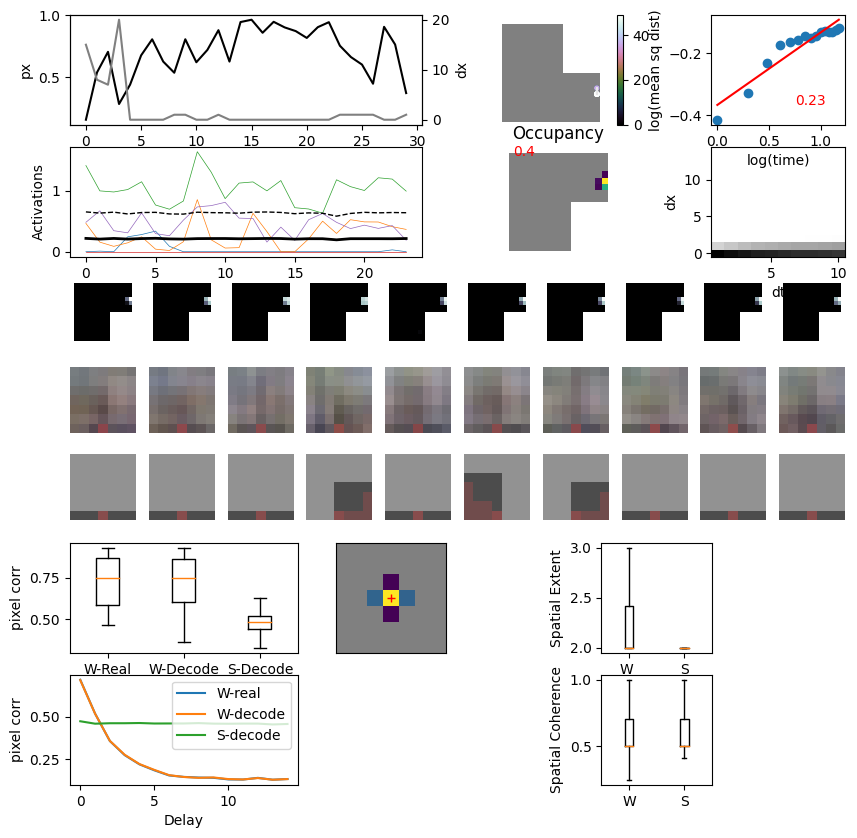

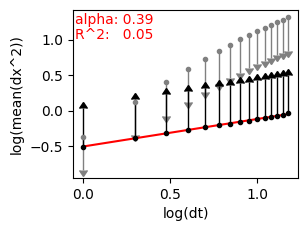

In [8]:
OTA.SpontTrajectoryFigure('noise',savefolder, trajRange=(50,100))
DRA.DiffusionFigure(netname+'noise', savefolder)

In [9]:
b_adapt = 1
tau_adapt=100
OTA_adapt = OfflineTrajectoryAnalysis(predictiveNet, noisemag = 0, noisestd=basenoise,
                                   withIsomap=False, decoder=OTA.decoder, 
                                      withAdapt=True, b_adapt = b_adapt, tau_adapt=tau_adapt,
                                      calculateViewSimilarity=True,
                                       compareWake=True)
DRA_adapt = DiffusionReplayAnalysis(predictiveNet, decoder = OTA.decoder,
                            compareWake=True, actionAgent=None,
                              noisestd = basenoise,withAdapt=True,
                                    b_adapt = b_adapt, tau_adapt=tau_adapt,
                                    num_trials = numtrials)

Running SLEEP
Running WAKE


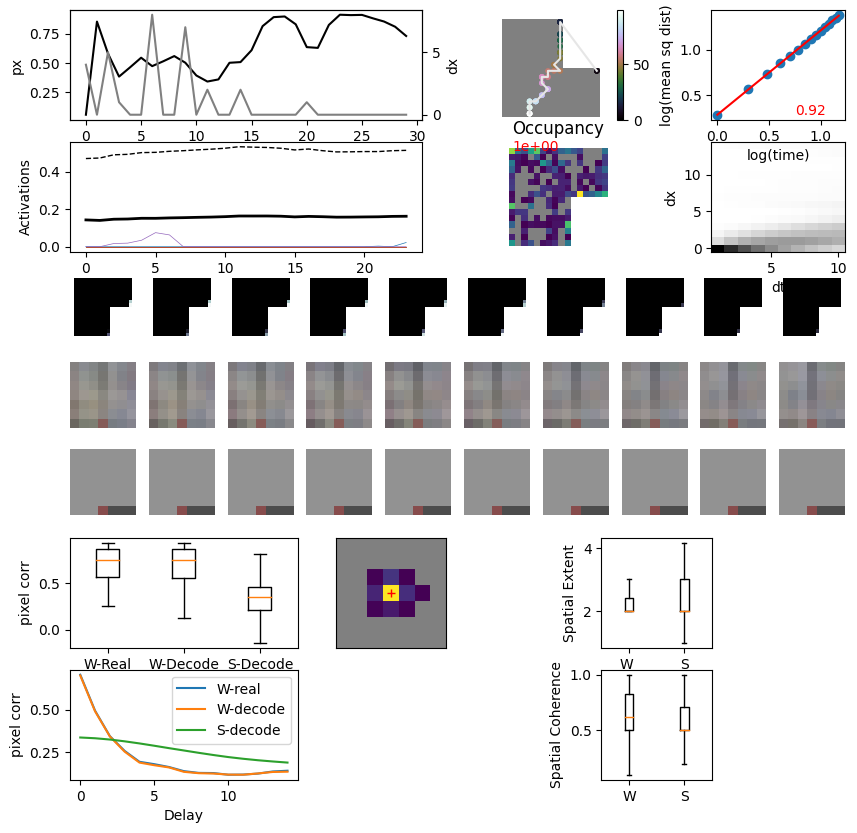

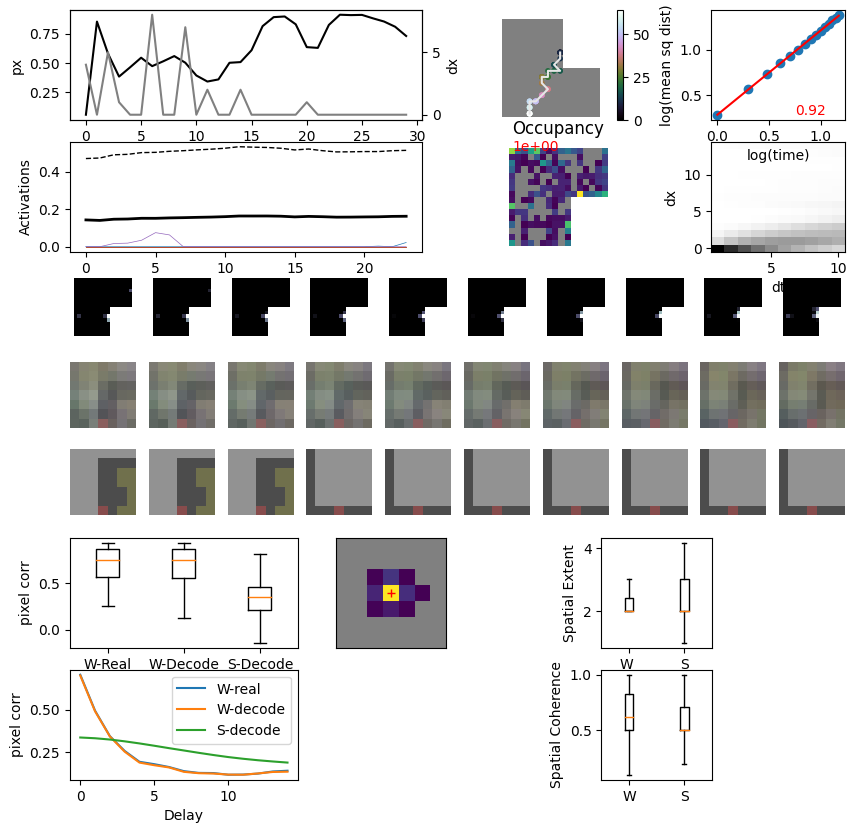

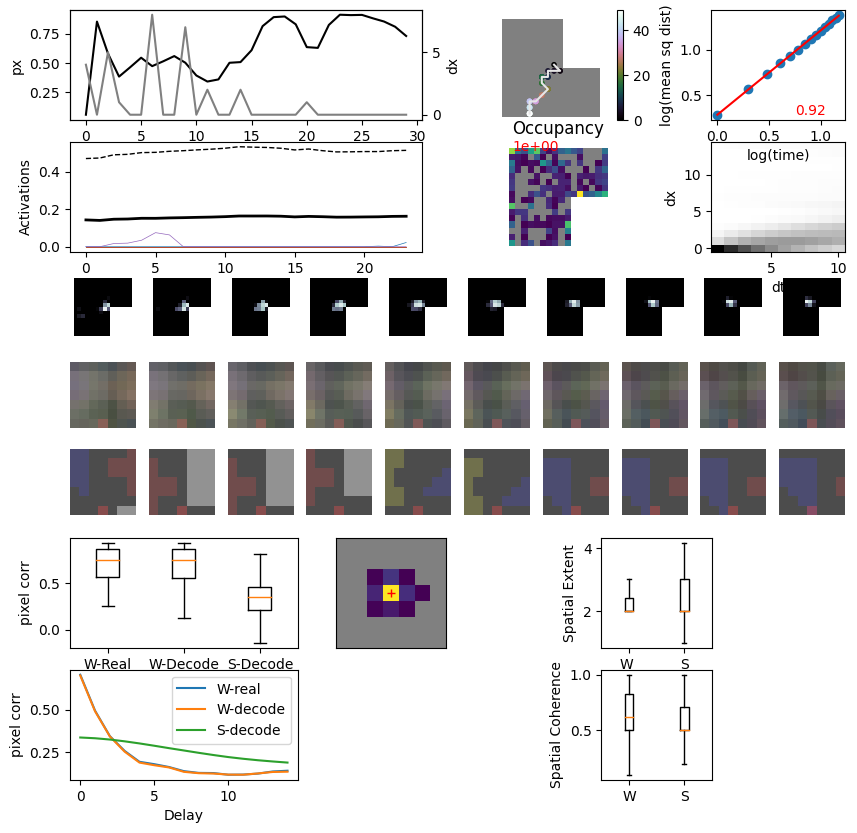

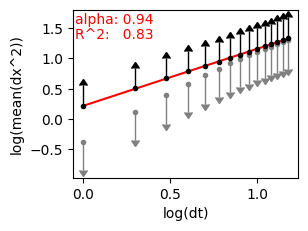

In [10]:
OTA_adapt.SpontTrajectoryFigure('adapt',savefolder, trajRange=(150,250))
OTA_adapt.SpontTrajectoryFigure('adapt2',savefolder, trajRange=(185,250))
OTA_adapt.SpontTrajectoryFigure('adapt3',savefolder, trajRange=(200,250))
DRA_adapt.DiffusionFigure(netname+'adapt', savefolder)

In [11]:
OTA_adaptHD = OfflineTrajectoryAnalysis(predictiveNet, noisemag = 0, noisestd=basenoise,
                                   withIsomap=False, decoder=OTA.decoder, 
                                      actionAgent='HDOnly',
                                      withAdapt=True, b_adapt = b_adapt, tau_adapt=tau_adapt,
                                      calculateViewSimilarity=True,
                                       compareWake=True)
DRA_adaptHD = DiffusionReplayAnalysis(predictiveNet, decoder = OTA.decoder,
                            compareWake=True, actionAgent='HDOnly',
                              noisestd = basenoise,withAdapt=True,
                                    b_adapt = b_adapt, tau_adapt=tau_adapt,
                                    num_trials = numtrials)

Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE


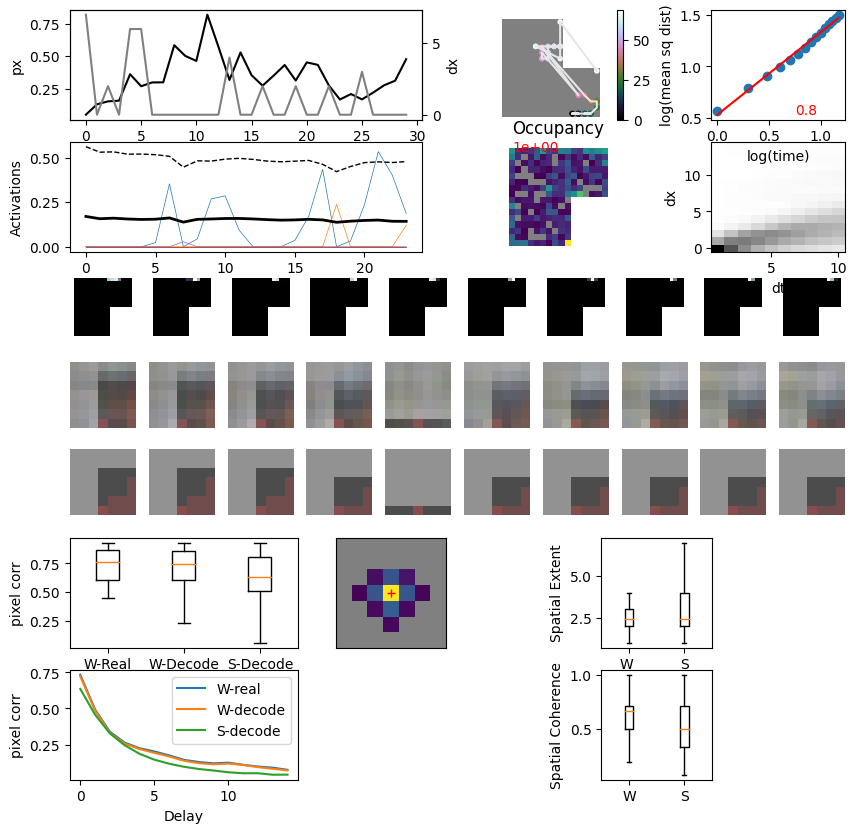

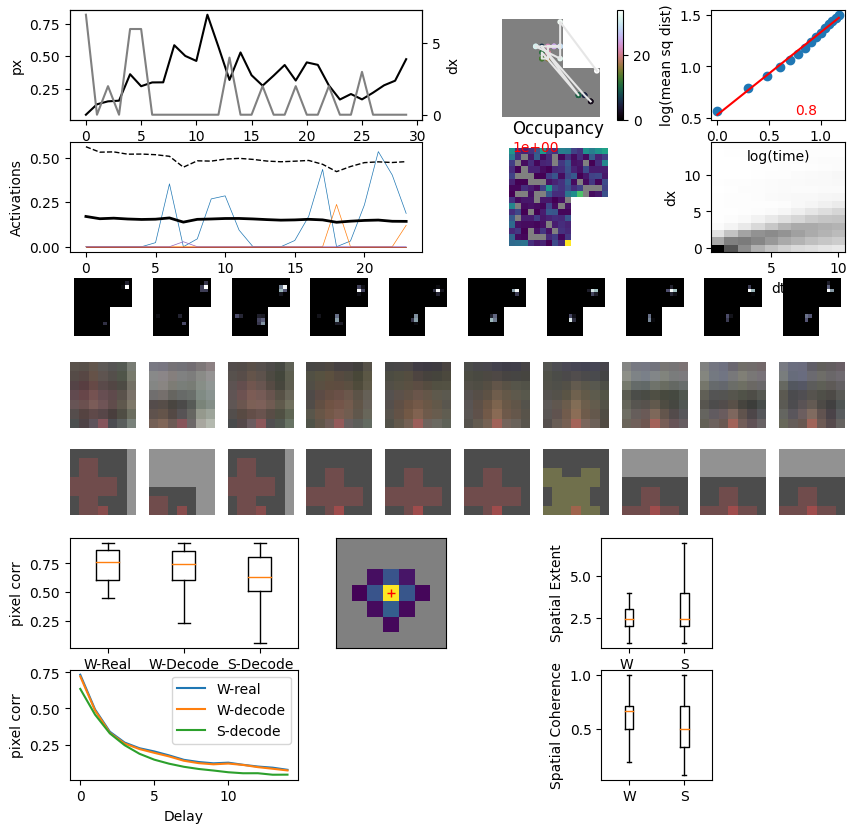

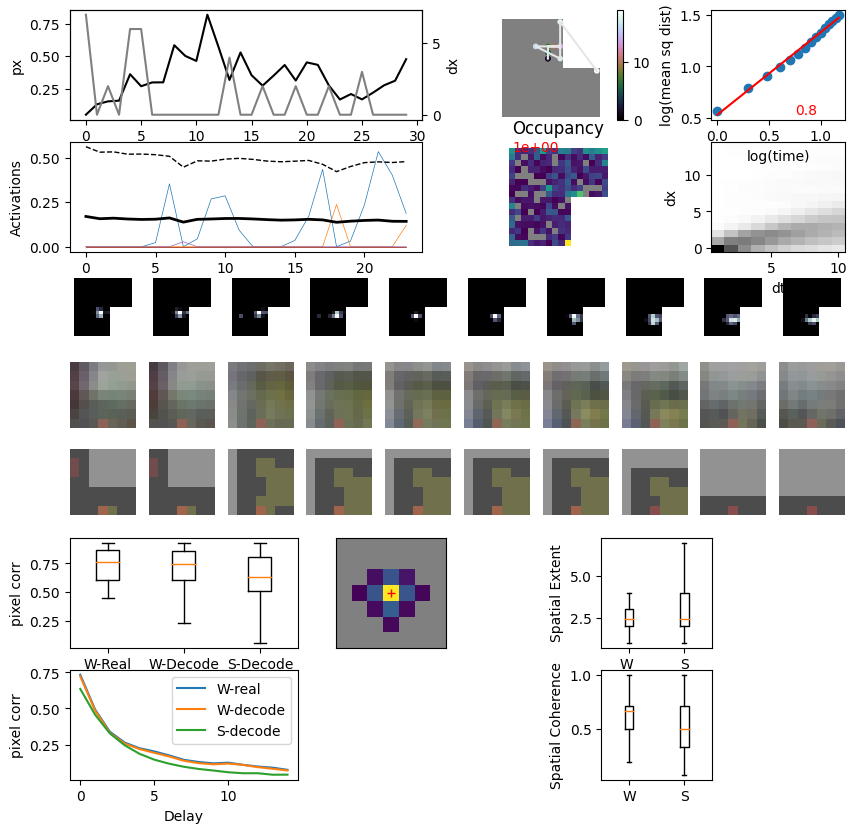

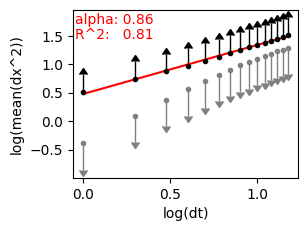

In [12]:
OTA_adaptHD.SpontTrajectoryFigure('adaptHD',savefolder, trajRange=(50,120))
OTA_adaptHD.SpontTrajectoryFigure('adaptHD2',savefolder, trajRange=(85,120))
OTA_adaptHD.SpontTrajectoryFigure('adaptHD3',savefolder, trajRange=(100,120))

DRA_adaptHD.DiffusionFigure(netname+'adaptHD', savefolder)
#OTA_adaptHD.transitionProbabilityFigure(netname+'adaptHD',savefolder)

In [13]:
OTA_query = OfflineTrajectoryAnalysis(predictiveNet, noisemag = 0, noisestd=basenoise,
                               withIsomap=False, decoder=OTA.decoder,
                                     actionAgent=True, calculateViewSimilarity=True,
                               compareWake=True)
DRA_query = DiffusionReplayAnalysis(predictiveNet, decoder = OTA.decoder,
                            compareWake=True, actionAgent=True,
                              noisestd = basenoise, num_trials = numtrials)

Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE


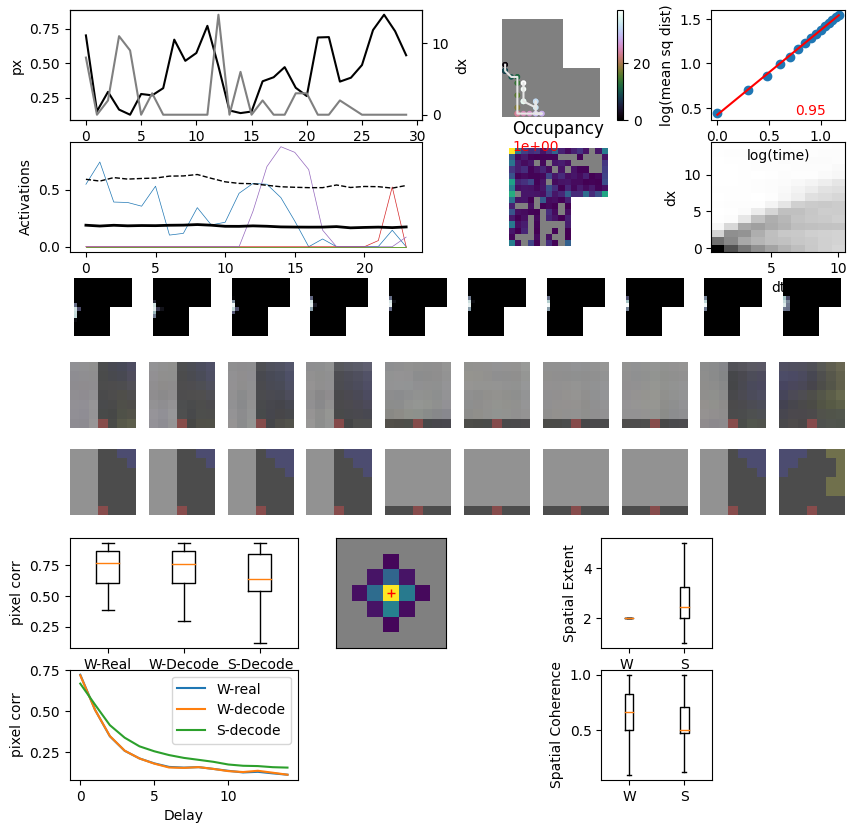

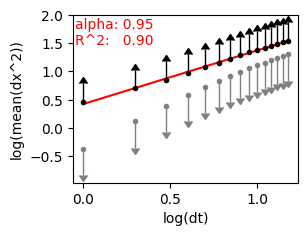

In [14]:
OTA_query.SpontTrajectoryFigure('query',savefolder, trajRange=(110,150))
DRA_query.DiffusionFigure(netname+'query', savefolder)
#OTA_query.transitionProbabilityFigure(netname+'query',savefolder)

In [15]:
_, _, decoder_NS = predictiveNet_NS.calculateSpatialRepresentation(env,agent,
                                             trainDecoder=True, trainHDDecoder = True)

Training Decoder on cuda...
loss: 5.845372 [    0\ 5000]
loss: 0.281944 [  500\ 5000]
loss: 0.153131 [ 1000\ 5000]
loss: 0.104594 [ 1500\ 5000]
loss: 0.080544 [ 2000\ 5000]
loss: 0.067788 [ 2500\ 5000]
loss: 0.054302 [ 3000\ 5000]
loss: 0.046673 [ 3500\ 5000]
loss: 0.039160 [ 4000\ 5000]
loss: 0.033471 [ 4500\ 5000]
loss: 0.029239 [ 4999\ 5000]
Training Complete. Back to the cpu
Training Decoder on cuda...
loss: 1.418081 [    0\ 5000]
loss: 0.328236 [  500\ 5000]
loss: 0.200503 [ 1000\ 5000]
loss: 0.150697 [ 1500\ 5000]
loss: 0.123154 [ 2000\ 5000]
loss: 0.101920 [ 2500\ 5000]
loss: 0.090085 [ 3000\ 5000]
loss: 0.075908 [ 3500\ 5000]
loss: 0.070009 [ 4000\ 5000]
loss: 0.064149 [ 4500\ 5000]
loss: 0.057115 [ 4999\ 5000]
Training Complete. Back to the cpu


In [16]:
OTA_NS = OfflineTrajectoryAnalysis(predictiveNet_NS, noisemag = 0, noisestd=plusnoise,
                               withIsomap=False, decoder=decoder_NS, calculateViewSimilarity=True,
                               compareWake=True)
DRA_NS = DiffusionReplayAnalysis(predictiveNet_NS, decoder = OTA_NS.decoder,
                            compareWake=False, actionAgent=None,
                              noisestd = plusnoise, num_trials = numtrials)
OTA_adapt_NS = OfflineTrajectoryAnalysis(predictiveNet_NS, noisemag = 0, noisestd=basenoise,
                                   withIsomap=False, decoder=OTA_NS.decoder, 
                                      withAdapt=True, b_adapt = b_adapt, tau_adapt=tau_adapt,
                                      calculateViewSimilarity=True,
                                       compareWake=True)
DRA_adapt_NS = DiffusionReplayAnalysis(predictiveNet_NS, decoder = OTA_NS.decoder,
                            compareWake=False, actionAgent=None,
                              noisestd = basenoise,withAdapt=True,
                                    b_adapt = b_adapt, tau_adapt=tau_adapt, num_trials = numtrials)
OTA_adaptHD_NS = OfflineTrajectoryAnalysis(predictiveNet_NS, noisemag = 0, noisestd=basenoise,
                               withIsomap=False, decoder=OTA_NS.decoder,
                                           withAdapt=True, b_adapt = b_adapt, tau_adapt=tau_adapt,
                                     actionAgent='HDOnly', calculateViewSimilarity=True,
                               compareWake=True)  
DRA_adaptHD_NS = DiffusionReplayAnalysis(predictiveNet_NS, decoder = OTA_NS.decoder,
                            compareWake=False, actionAgent='HDOnly',
                              noisestd = basenoise,withAdapt=True,
                                    b_adapt = b_adapt, tau_adapt=tau_adapt, num_trials = numtrials)
OTA_query_NS = OfflineTrajectoryAnalysis(predictiveNet_NS, noisemag = 0, noisestd=basenoise,
                               withIsomap=False, decoder=OTA_NS.decoder,
                                     actionAgent=True, calculateViewSimilarity=True,
                               compareWake=True)
DRA_query_NS = DiffusionReplayAnalysis(predictiveNet_NS, decoder = OTA_NS.decoder,
                            compareWake=False, actionAgent=True,
                              noisestd = basenoise, num_trials = numtrials)

Running SLEEP
Running WAKE
Running SLEEP
Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE


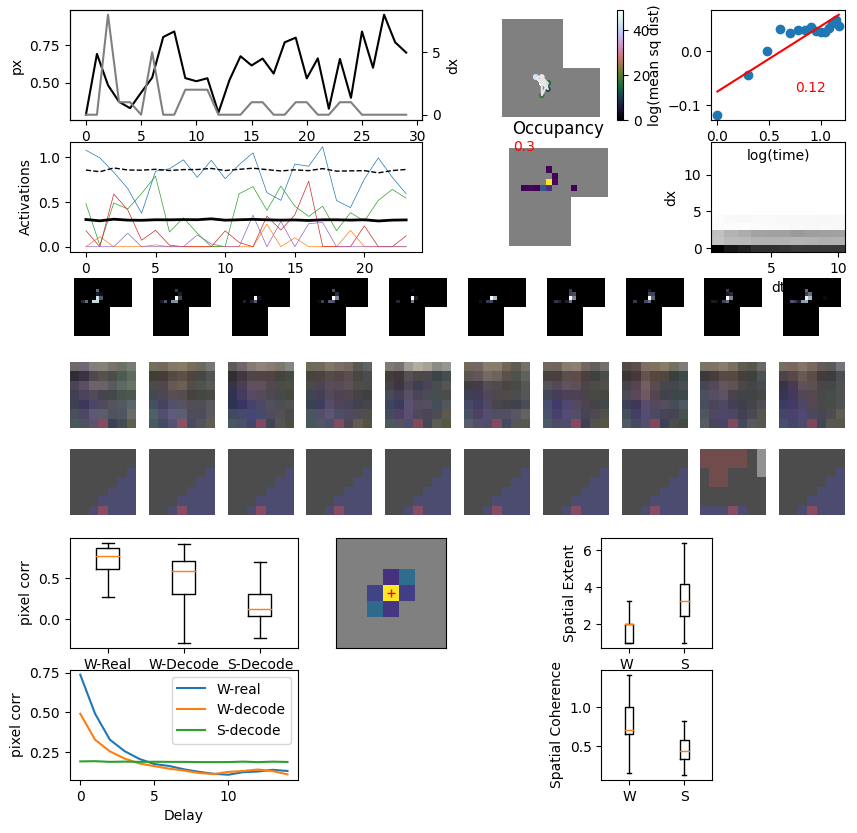

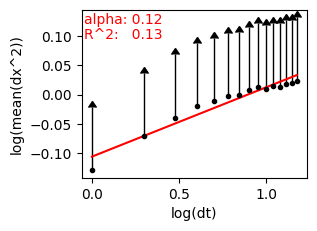

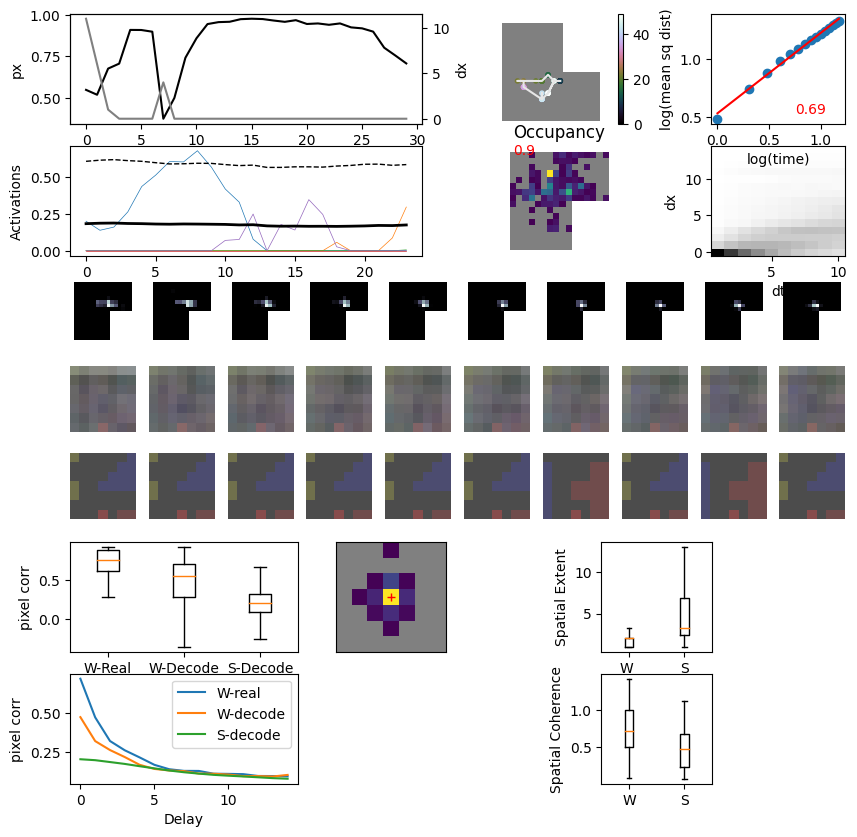

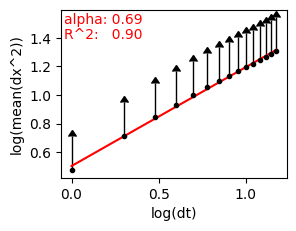

In [17]:
OTA_NS.SpontTrajectoryFigure('NS_noise',savefolder, trajRange=(75,125))
DRA_NS.DiffusionFigure(netname+'NS_noise', savefolder)
OTA_adapt_NS.SpontTrajectoryFigure('NS_adapt',savefolder, trajRange=(250,300))
DRA_adapt_NS.DiffusionFigure(netname+'NS_adapt', savefolder)

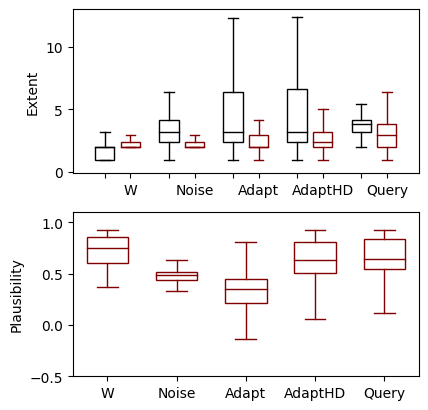

In [19]:
NextStep_coherence = [OTA_NS.spatialCoherence_WAKE['cohere'],
            DRA_NS.coherence.flatten(),
            DRA_adapt_NS.coherence.flatten(),
                     DRA_adaptHD_NS.coherence.flatten(),
           DRA_query_NS.coherence.flatten()]

Sequential_coherence = [OTA.spatialCoherence_WAKE['cohere'],
            DRA.coherence.flatten(),
              DRA_adapt.coherence.flatten(),
                       DRA_adaptHD.coherence.flatten(),
             DRA_query.coherence.flatten()]

NextStep_coherence_norm = [OTA_NS.spatialCoherence_WAKE['cohere']/OTA_NS.spatialCoherence_WAKE['cohere'].mean(),
            DRA_NS.coherence.flatten()/OTA_NS.spatialCoherence_WAKE['cohere'].mean(),
            DRA_adapt_NS.coherence.flatten()/OTA_NS.spatialCoherence_WAKE['cohere'].mean(),
                          DRA_adaptHD_NS.coherence.flatten()/OTA_NS.spatialCoherence_WAKE['cohere'].mean(),
           DRA_query_NS.coherence.flatten()/OTA_NS.spatialCoherence_WAKE['cohere'].mean()]

Sequential_coherence_norm = [OTA.spatialCoherence_WAKE['cohere']/OTA.spatialCoherence_WAKE['cohere'].mean(),
            DRA.coherence.flatten()/OTA.spatialCoherence_WAKE['cohere'].mean(),
              DRA_adapt.coherence.flatten()/OTA.spatialCoherence_WAKE['cohere'].mean(),
                            DRA_adaptHD.coherence.flatten()/OTA.spatialCoherence_WAKE['cohere'].mean(),
             DRA_query.coherence.flatten()/OTA.spatialCoherence_WAKE['cohere'].mean()]

NextStep_extent = [OTA_NS.spatialCoherence_WAKE['extent'],
                    DRA_NS.extent.flatten(),
                   DRA_adapt_NS.extent.flatten(),
                  DRA_adaptHD_NS.extent.flatten(),
                  DRA_query_NS.extent.flatten()]

Sequential_extent = [OTA.spatialCoherence_WAKE['extent'],
                    DRA.extent.flatten(),
                   DRA_adapt.extent.flatten(),
                    DRA_adaptHD.extent.flatten(),
                    DRA_query.extent.flatten()]

NextStep_view = [OTA_NS.ViewSimilarity['MSE_wake'][0],
            OTA_NS.ViewSimilarity['MSE_sleep'][0],
                 OTA_adapt_NS.ViewSimilarity['MSE_sleep'][0],
                OTA_adaptHD_NS.ViewSimilarity['MSE_sleep'][0],
            OTA_query_NS.ViewSimilarity['MSE_sleep'][0]]

Sequential_view = [OTA.ViewSimilarity['MSE_wake'][0],
            OTA.ViewSimilarity['MSE_sleep'][0],
                   OTA_adapt.ViewSimilarity['MSE_sleep'][0],
                  OTA_adaptHD.ViewSimilarity['MSE_sleep'][0],
            OTA_query.ViewSimilarity['MSE_sleep'][0]]

names = ['Sequential','Next-Step']

seqpos = np.arange(5)
NSpos = np.arange(5)-0.4

colors = ['k','darkgrey','lightcoral','maroon']

plt.figure(figsize=(8,6))
    
plt.subplot(3,2,1)
c='maroon'
plt.boxplot(Sequential_extent,
           showfliers=False,
           labels=['W','Noise','Adapt','AdaptHD','Query'],
           positions=seqpos,
           widths=0.3,
           patch_artist=True,
            boxprops=dict(facecolor='w', color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            medianprops=dict(color=c))
c='k'
plt.boxplot(NextStep_extent,
           showfliers=False,
            labels=['','','','',''],
           positions=NSpos,
           widths=0.3,
           patch_artist=True,
            boxprops=dict(facecolor='w', color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c))
plt.ylim([-0.1,13])
plt.ylabel('Extent')



plt.subplot(3,2,3)
c='maroon'
plt.boxplot(Sequential_view,
           showfliers=False,
           labels=['W','Noise','Adapt','AdaptHD','Query'],
           positions=seqpos,
           widths=0.6,
           patch_artist=True,
            boxprops=dict(facecolor='w', color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            medianprops=dict(color=c))
c='k'
# plt.boxplot(NextStep_view,
#            showfliers=False,
#             labels=['','','','',''],
#            positions=NSpos,
#            widths=0.3,
#            patch_artist=True,
#             boxprops=dict(facecolor='w', color=c),
#             capprops=dict(color=c),
#             whiskerprops=dict(color=c),
#             flierprops=dict(color=c, markeredgecolor=c),
#             medianprops=dict(color=c))
plt.ylim([-0.5,1.1])
plt.ylabel('Plausibility')

    
# for idx,data in enumerate([Sequential_coherence_norm,NextStep_coherence_norm]):
#     plt.subplot(3,2,5+idx)
#     plt.boxplot(data,
#                showfliers=False,
#                labels=['W','Noise','Adapt','Query','AdaptHD'])
#     plt.plot(plt.xlim(),[1,1],'k--')
#     plt.ylim([-0.1,2])
#     plt.ylabel('Coherence')
#     plt.title(names[idx])
    
    
plt.tight_layout()

saveFig(plt.gcf(),'CompareSleeps',savefolder,
        filetype='pdf')

plt.show()

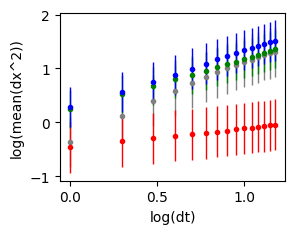

In [47]:
plt.figure()
plt.subplot(2,2,1)
DRA.diffusionFitPanel(DRA.delays, DRA.msd, None, DRA.msd_WAKE,
                       showTrialPoints=False, halflims=False, color='r')
DRA_adapt.diffusionFitPanel(DRA_adapt.delays, DRA_adapt.msd, None, None,
                       showTrialPoints=False, halflims=False, color='g')
#DRA_adaptHD.diffusionFitPanel(DRA_adaptHD.delays, DRA_adaptHD.msd, None, None,
#                       showTrialPoints=False, halflims=False, color='b')
DRA_query.diffusionFitPanel(DRA_adaptHD.delays, DRA_query.msd, None, None,
                       showTrialPoints=False, halflims=False, color='b')

saveFig(plt.gcf(),'CompareNets_Alpha',savefolder,
        filetype='pdf')

In [131]:
nettypes = ['thRNN']
kvalues = ['0','1','2','3','4','5','6']
masks = ['']
seeds = ['100','101','102','103','104','105','106','107','108']
#seeds = ['101','102','106']
aEncs = ['Onehot','SpeedHD','Velocities']
#aEncs = ['Onehot','SpeedHD']

netprops = itertools.product(*[nettypes,['_'],kvalues,['win'],masks,['-'],aEncs,['-s'],seeds])
netprops = list(netprops)
netnames = [''.join(name) for name in netprops]
nettype = ['Mask k'+name[2] for name in netprops]
netmask = [name[4] for name in netprops]
netAE = [name[6] for name in netprops]
netseed = [int(name[8]) for name in netprops]

netk = [int(name[2]) for name in netprops]
netfolder = '/maskedk_panel/'

analysisFrame_kpanel = pd.DataFrame(data={'filename':netnames, 'type':nettype, 'mask':netmask, 'k':netk,
                                   'ActionEnc':netAE, 'seed':netseed, 'netfolder':netfolder})

In [132]:
nettypes = ['AutoencoderPred_LN']

netprops = itertools.product(*[nettypes,['-'],aEncs,['-s'],seeds])
netprops = list(netprops)
netnames = [''.join(name) for name in netprops]
nettype = [name[0] for name in netprops]
#netmask = [name[4] for name in netprops]
netAE = [name[2] for name in netprops]
netseed = [int(name[4]) for name in netprops]
netfolder = '/Autoencoder_sparse_panel/'


analysisFrame_sparse = pd.DataFrame(data={'filename':netnames, 'type':'N-S (+LN)', 'ActionEnc':netAE, 'seed':netseed,
                                      'netfolder':netfolder})

In [133]:
analysisFrame = pd.concat([analysisFrame_sparse, analysisFrame_kpanel])
#analysisFrame = analysisFrame_kpanel

In [134]:

def loadNet(row):
    try:
        net = PredictiveNet.loadNet(row['netfolder']+row['filename'],suppressText=True)
        return net
    except:
        print(f"{row['filename']} does not exist")
        net = PredictiveNet
        

analysisFrame['net'] = analysisFrame.apply(loadNet, axis = 1)

In [135]:
predictiveNet.trainArgs

Namespace(actenc='SpeedHD', bias_lr=0.1, bptttrunc=100000000.0, contin=False, dropout=0.15, env='MiniGrid-LRoom-18x18-v0', hiddensize=500, identityInit=False, load_env=-1, loadfolder='', lr=0.002, namext='SpeedHD', noisemean=0, noisestd=0.03, ntimescale=2.0, numepochs=80, numtrials=1000, pRNNtype='thRNN_5win', saveTrainData=False, savefolder='maskedk_panel/', seed=102, seqdur=600, sparsity=0.5, trainBias=True, weight_decay=0.003)

In [136]:
def getDiffusionReplay(row):
    #predictiveNet = loadNet(row)
    predictiveNet = row['net']
    try:
        replay_extent_wake = predictiveNet.TrainingSaver.replay_extent_wake.values[-1]
        replay_coherence_wake = predictiveNet.TrainingSaver.replay_coherence_wake.values[-1]
        
        replay_alpha_query = predictiveNet.TrainingSaver.replay_alpha_query.values[-1]
        replay_alpha_adapt = predictiveNet.TrainingSaver.replay_alpha_adapt.values[-1]
        replay_alpha_noise = predictiveNet.TrainingSaver.replay_alpha_noise.values[-1]
        replay_int_query = predictiveNet.TrainingSaver.replay_int_query.values[-1]
        replay_int_adapt = predictiveNet.TrainingSaver.replay_int_adapt.values[-1]
        replay_int_noise = predictiveNet.TrainingSaver.replay_int_noise.values[-1]
        replay_view_query = predictiveNet.TrainingSaver.replay_view_query.values[-1]
        replay_view_adapt = predictiveNet.TrainingSaver.replay_view_adapt.values[-1]
        replay_view_noise = predictiveNet.TrainingSaver.replay_view_noise.values[-1]
        
        replay_coherence_query = predictiveNet.TrainingSaver.replay_coherence_query.values[-1]
        replay_coherence_adapt = predictiveNet.TrainingSaver.replay_coherence_adapt.values[-1]
        replay_coherence_noise = predictiveNet.TrainingSaver.replay_coherence_noise.values[-1]
        replay_extent_query = predictiveNet.TrainingSaver.replay_extent_query.values[-1]
        replay_extent_adapt = predictiveNet.TrainingSaver.replay_extent_adapt.values[-1]
        replay_extent_noise = predictiveNet.TrainingSaver.replay_extent_noise.values[-1]
        

    except:
        (replay_alpha_query,replay_alpha_adapt, replay_alpha_noise, 
            replay_int_query, replay_int_adapt, replay_int_noise, 
            replay_view_query, replay_view_adapt, replay_view_noise,
            replay_coherence_query, replay_coherence_adapt, replay_coherence_noise,
            replay_extent_query, replay_extent_adapt, replay_extent_noise,
           replay_extent_wake,replay_coherence_wake) = (np.nan,np.nan,np.nan,
                                                                    np.nan,np.nan,np.nan,
                                                                    np.nan,np.nan,np.nan,
                                                                          np.nan,np.nan,np.nan,
                                                                          np.nan,np.nan,np.nan,
                                                       np.nan,np.nan)
        
        
    
    return (replay_alpha_query,replay_alpha_adapt, replay_alpha_noise, 
            replay_int_query, replay_int_adapt, replay_int_noise, 
            replay_view_query, replay_view_adapt, replay_view_noise,
            replay_coherence_query, replay_coherence_adapt, replay_coherence_noise,
            replay_extent_query, replay_extent_adapt, replay_extent_noise,
           replay_extent_wake,replay_coherence_wake)
analysisFrame[['replay_alpha_query','replay_alpha_adapt', 'replay_alpha_noise', 
               'replay_int_query', 'replay_int_adapt', 'replay_int_noise', 
               'replay_view_query', 'replay_view_adapt', 'replay_view_noise',
               'replay_coherence_query', 'replay_coherence_adapt', 'replay_coherence_noise',
               'replay_extent_query', 'replay_extent_adapt', 'replay_extent_noise',
              'replay_extent_wake','replay_coherence_wake']] = analysisFrame.apply(getDiffusionReplay, axis = 1, result_type="expand")

In [137]:
analysisFrame['replay_extent_norm'] = analysisFrame['replay_extent_noise']/analysisFrame['replay_extent_wake']
analysisFrame['replay_coherence_norm'] = analysisFrame['replay_coherence_noise']/analysisFrame['replay_coherence_wake']
analysisFrame['replay_extent_adapt_norm'] = analysisFrame['replay_extent_adapt']/analysisFrame['replay_extent_wake']
analysisFrame['replay_coherence_adapt_norm'] = analysisFrame['replay_coherence_adapt']/analysisFrame['replay_coherence_wake']

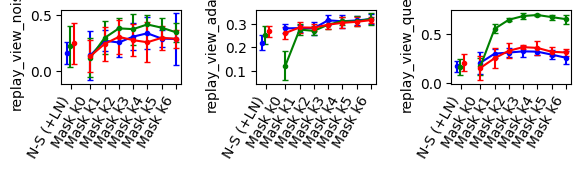

In [138]:
#CANN_sRSA = RGA_CANN.RSA_cs[0][0]
#CANN_SW = RGA_CANN.SWdist_cs[0]
#stats: all nets, mean SI, p50, sRSA, SWDist (compare action encodings), mean+/- std over seeds
#example nets: SI distribution and EV distribution (Speed+HD all)
examplenets = (analysisFrame['ActionEnc']=='SpeedHD') & (analysisFrame['seed']==0)
#wakeval = 1.2
plt.figure(figsize=(6,6))

maskedidx = np.arange(1,8)
NSidx = np.arange(0,1)
colors = ['blue','green','red','purple']
metrics = ['replay_view_noise','replay_view_adapt','replay_view_query']
for aidx,act in enumerate(analysisFrame['ActionEnc'].unique()):
    data = analysisFrame[analysisFrame['ActionEnc']==act][metrics+['type']]
    panel = data.groupby('type',sort=False).agg([np.mean, np.std])


    for idx,metric in enumerate(metrics):   
        plt.subplot(4,3,1+idx)
        plt.errorbar(maskedidx,panel[metric]['mean'][maskedidx], 
                         panel[metric]['std'][maskedidx],
                    capsize=2,fmt='.-',color=colors[aidx],label=act)
        plt.errorbar(NSidx+0.25*aidx-0.66,panel[metric]['mean'][NSidx], 
                         panel[metric]['std'][NSidx],
                    capsize=2,fmt='.',color=colors[aidx])
        #plt.plot(plt.xlim(),[wakeval,wakeval],'k--')
        plt.ylabel(metric)
        plt.gca().set_xticks(np.concatenate([NSidx-0.33,maskedidx]), labels=panel.index)
        plt.xticks(rotation=60, ha='right')
        #if metric == 'sRSA':
        #    plt.plot([NSidx[0]-0.33,maskedidx[-1]],[CANN_sRSA,CANN_sRSA],'k--')
        #if metric == 'SWdist':
        #    #plt.plot([NSidx[0]-0.33,maskedidx[-1]],[CANN_SW,CANN_SW],'k--')
        #if idx==2:
            #plt.legend(fontsize='xx-small')

plt.tight_layout()

saveFig(plt.gcf(),'CompareNets_Plaus',savefolder,
        filetype='pdf')

plt.show()

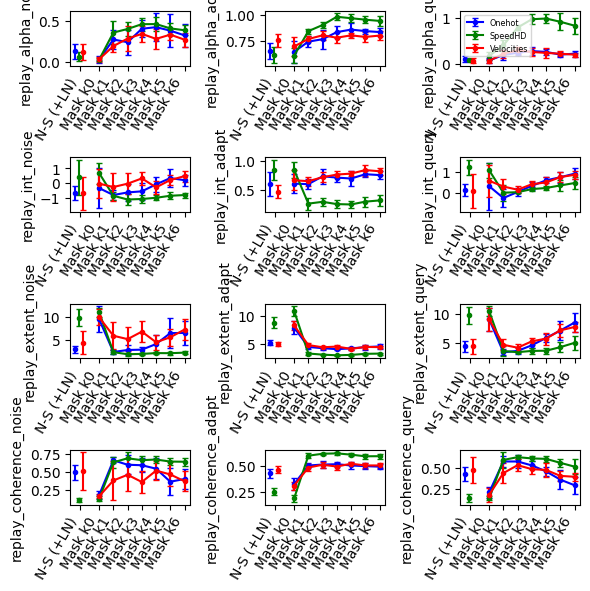

In [139]:
#CANN_sRSA = RGA_CANN.RSA_cs[0][0]
#CANN_SW = RGA_CANN.SWdist_cs[0]
#stats: all nets, mean SI, p50, sRSA, SWDist (compare action encodings), mean+/- std over seeds
#example nets: SI distribution and EV distribution (Speed+HD all)
examplenets = (analysisFrame['ActionEnc']=='SpeedHD') & (analysisFrame['seed']==0)
#wakeval = 1.2
plt.figure(figsize=(6,6))

maskedidx = np.arange(1,8)
NSidx = np.arange(0,1)
colors = ['blue','green','red','purple']
metrics = ['replay_alpha_noise','replay_alpha_adapt','replay_alpha_query',
           'replay_int_noise','replay_int_adapt','replay_int_query',
           'replay_extent_noise','replay_extent_adapt','replay_extent_query',
           'replay_coherence_noise','replay_coherence_adapt', 'replay_coherence_query']
for aidx,act in enumerate(analysisFrame['ActionEnc'].unique()):
    data = analysisFrame[analysisFrame['ActionEnc']==act][metrics+['type']]
    panel = data.groupby('type',sort=False).agg([np.mean, np.std])


    for idx,metric in enumerate(metrics):   
        plt.subplot(4,3,1+idx)
        plt.errorbar(maskedidx,panel[metric]['mean'][maskedidx], 
                         panel[metric]['std'][maskedidx],
                    capsize=2,fmt='.-',color=colors[aidx],label=act)
        plt.errorbar(NSidx+0.25*aidx-0.66,panel[metric]['mean'][NSidx], 
                         panel[metric]['std'][NSidx],
                    capsize=2,fmt='.',color=colors[aidx])
        #plt.plot(plt.xlim(),[wakeval,wakeval],'k--')
        plt.ylabel(metric)
        plt.gca().set_xticks(np.concatenate([NSidx-0.33,maskedidx]), labels=panel.index)
        plt.xticks(rotation=60, ha='right')
        #if metric == 'sRSA':
        #    plt.plot([NSidx[0]-0.33,maskedidx[-1]],[CANN_sRSA,CANN_sRSA],'k--')
        #if metric == 'SWdist':
        #    #plt.plot([NSidx[0]-0.33,maskedidx[-1]],[CANN_SW,CANN_SW],'k--')
        if idx==2:
            plt.legend(fontsize='xx-small')

plt.tight_layout()

saveFig(plt.gcf(),'CompareNets',savefolder,
        filetype='pdf')

plt.show()

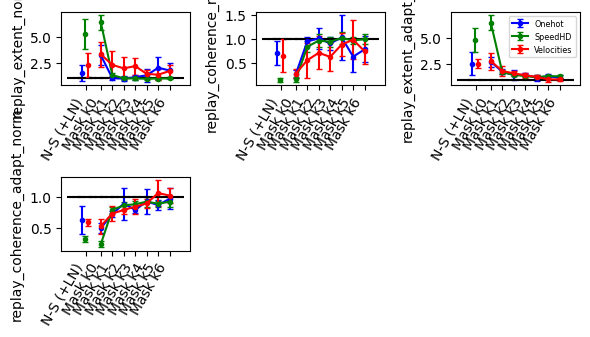

In [140]:
#CANN_sRSA = RGA_CANN.RSA_cs[0][0]
#CANN_SW = RGA_CANN.SWdist_cs[0]
#stats: all nets, mean SI, p50, sRSA, SWDist (compare action encodings), mean+/- std over seeds
#example nets: SI distribution and EV distribution (Speed+HD all)
examplenets = (analysisFrame['ActionEnc']=='SpeedHD') & (analysisFrame['seed']==0)
#wakeval = 1.2
plt.figure(figsize=(6,6))

maskedidx = np.arange(1,8)
NSidx = np.arange(0,1)
colors = ['blue','green','red','purple']
metrics = ['replay_extent_norm', 'replay_coherence_norm', 'replay_extent_adapt_norm', 'replay_coherence_adapt_norm']
for aidx,act in enumerate(analysisFrame['ActionEnc'].unique()):
    data = analysisFrame[analysisFrame['ActionEnc']==act][metrics+['type']]
    panel = data.groupby('type',sort=False).agg([np.mean, np.std])


    for idx,metric in enumerate(metrics):   
        plt.subplot(4,3,1+idx)
        plt.errorbar(maskedidx,panel[metric]['mean'][maskedidx], 
                         panel[metric]['std'][maskedidx],
                    capsize=2,fmt='.-',color=colors[aidx],label=act)
        plt.errorbar(NSidx+0.25*aidx-0.66,panel[metric]['mean'][NSidx], 
                         panel[metric]['std'][NSidx],
                    capsize=2,fmt='.',color=colors[aidx])
        plt.plot(plt.xlim(),[1,1],'k--')
        #plt.plot(plt.xlim(),[wakeval,wakeval],'k--')
        plt.ylabel(metric)
        plt.gca().set_xticks(np.concatenate([NSidx-0.33,maskedidx]), labels=panel.index)
        plt.xticks(rotation=60, ha='right')
        #if metric == 'sRSA':
        #    plt.plot([NSidx[0]-0.33,maskedidx[-1]],[CANN_sRSA,CANN_sRSA],'k--')
        #if metric == 'SWdist':
        #    #plt.plot([NSidx[0]-0.33,maskedidx[-1]],[CANN_SW,CANN_SW],'k--')
        if idx==2:
            plt.legend(fontsize='xx-small')

plt.tight_layout()

saveFig(plt.gcf(),'CompareNets_norm',savefolder,
        filetype='pdf')

plt.show()